[View in Colaboratory](https://colab.research.google.com/github/arowshan/mnist-digit-recognizer/blob/master/digit_recognizer_model1.ipynb)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

In [0]:
# separate cell for loading data because it can be time consuming
train_data = pd.read_csv('./mnist-digit-recognizer/train.csv')

In [0]:
y_train = train_data['label']
X_train = train_data.drop(['label'], axis=1)
y_train_tensor = torch.tensor(y_train.values)
X_train_tensor = torch.tensor(X_train.values)
# y_train_tensor = torch.tensor(y_train.values).to(device)
# X_train_tensor = torch.tensor(X_train.values).to(device)

In [0]:
hidden_size = 400
batch_size = 50
epochs = 200

In [0]:
class Net(nn.Module):
  
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    y = F.log_softmax(x)
    return y

net = Net()
# net.to(device)

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.00005, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

In [0]:
loss_log = []
start_time = time.time()

for epoch in range(epochs):
  for i in range(0, X_train_tensor.shape[0], batch_size):
    x_mini = X_train_tensor[i :i+batch_size] 
    y_mini = y_train_tensor[i :i+batch_size] 

    x_var = Variable(x_mini.float())
    y_var = Variable(y_mini)

    optimizer.zero_grad()
    net_out = net(x_var)

    loss = loss_func(net_out, y_var)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
      loss_log.append(loss.data[0])

  print('Epoch: {} - Loss: {:.6f}'.format(epoch, loss.data[0]))
  
end_time = time.time()
total_time = end_time - start_time

print('Time passed: ', total_time)

In [0]:
test_data = pd.read_csv('./mnist-digit-recognizer/test.csv')
test_tensor = torch.tensor(test_data.values)
# test_tensor = torch.tensor(test_data.values).to(device)
test_var = Variable(test_tensor.float())

In [446]:
net_test = net(test_var)

c:\users\arash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [0]:
# cuda_tensor = (torch.max(net_test.data, 1)[1]).cuda()
# output = cuda_tensor.cpu().numpy()
output = (torch.max(net_test.data, 1)[1]).numpy()


In [0]:
np.savetxt("submission.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d", newline='\r\n', header="ImageId,Label", comments='')

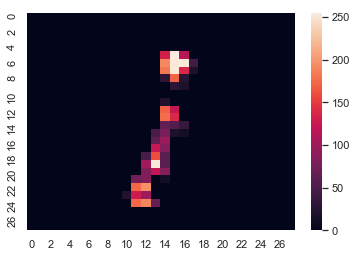

In [449]:
sns.set()
a = test_data.iloc[27992].values.reshape((28, 28))
sns.heatmap(a)